In [1]:
%reload_ext autoreload
%autoreload 2

import numpy as np
import joblib
import matplotlib.pyplot as plt
import matplotlib as mpl

from src.files import results_dir
from src.plotting import errorPlot
from src.iaf.analysis import gather_metadata, gather_results, gather_rates, gather_weights

In [2]:
# Gotta add the config files to the run data (see new iaf_correlation.py script!!!)

In [2]:
experiment_folder = results_dir("iaf_runs") / "correlated" / "20250320"
metadata = gather_metadata(experiment_folder, experiment_type="correlation")
firing_rates = gather_rates(metadata, experiment_type="correlation")
weights = gather_weights(metadata, experiment_type="correlation", average_method="fraction", average_window=0.2, normalize=True)

In [3]:
results = gather_results(metadata)

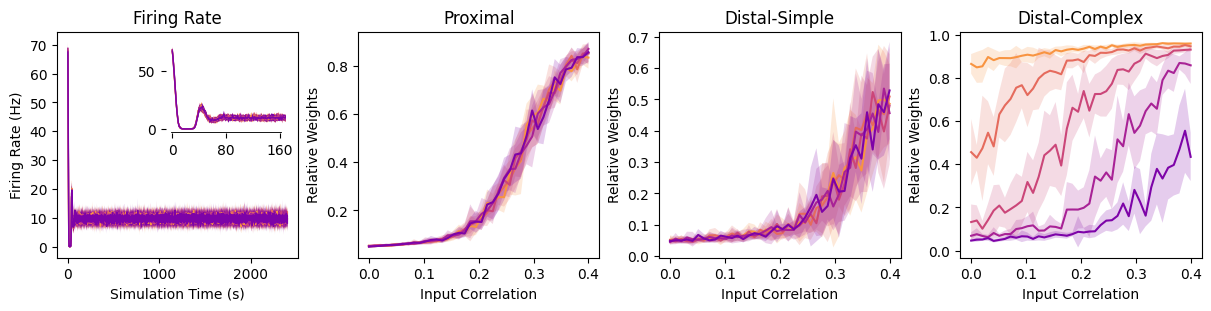

In [4]:
num_ratios = len(metadata["dp_ratios"])
cmap = mpl.colormaps["plasma_r"]
colors = [cmap(ii) for ii in np.linspace(0, 1, num_ratios+4)[2:-2]]

num_inputs = metadata["base_config"].sources["excitatory"].num_inputs
max_corr = metadata["base_config"].sources["excitatory"].max_correlation
xvals = np.linspace(max_corr, 0, num_inputs)

fig, ax = plt.subplots(1, 4, figsize=(12, 3), layout="constrained")
inset = ax[0].inset_axes([0.45, 0.55, 0.5, 0.4])
for iratio in range(num_ratios):
    errorPlot(range(metadata["duration"]), np.mean(firing_rates[iratio], axis=1), axis=0, ax=ax[0], color=colors[iratio], linewidth=1.0)
    errorPlot(range(metadata["duration"]), np.mean(firing_rates[iratio], axis=1), axis=0, ax=inset, color=colors[iratio], linewidth=1.0)
    proximal_mean = np.mean(weights["proximal"][iratio], axis=1)  
    distal_simple_mean = np.mean(weights["distal-simple"][iratio], axis=1)
    distal_complex_mean = np.mean(weights["distal-complex"][iratio], axis=1)
    errorPlot(xvals, proximal_mean, axis=0, ax=ax[1], color=colors[iratio], alpha=0.2, linewidth=1.5)
    errorPlot(xvals, distal_simple_mean, axis=0, ax=ax[2], color=colors[iratio], alpha=0.2, linewidth=1.5)
    errorPlot(xvals, distal_complex_mean, axis=0, ax=ax[3], color=colors[iratio], alpha=0.2, linewidth=1.5)
ylim0 = ax[0].get_ylim()
inset.set_xlim(-10, 170)
inset.set_xticks([0, 80, 160])
inset.spines["top"].set_visible(False)
inset.spines["right"].set_visible(False)
inset.spines["left"].set_visible(False)
inset.spines["bottom"].set_visible(False)
inset.plot([0, 160], [ylim0[0], ylim0[0]], color="k", linewidth=2.0)
inset.set_ylim(ylim0)
ax[0].set_xlabel("Simulation Time (s)")
ax[0].set_ylabel("Firing Rate (Hz)")
ax[0].set_title("Firing Rate")
for axx, name in zip(ax[1:], ["Proximal", "Distal-Simple", "Distal-Complex"]):
    axx.set_xlabel("Input Correlation")
    axx.set_ylabel("Relative Weights")
    axx.set_title(name)
plt.show()